In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train), (X_test,y_test)= mnist.load_data()

In [3]:
X_train= X_train/255
X_test= X_test/255

In [4]:
model= Sequential([Conv2D(32,(3,3),input_shape= (28,28,1),activation='relu'),
                   MaxPool2D(pool_size=(2,2),padding='same'),
                   Conv2D(32,(3,3),activation='relu'),
                   MaxPool2D(pool_size=(2,2),padding='same'),
                   Flatten(),
                   Dense(1152, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(32, activation='relu'),
                   Dense(10, activation='softmax')])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1152)              1

In [6]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics='accuracy')

In [7]:
history= model.fit(X_train, y_train,epochs=10,verbose='auto',validation_split=0.2,use_multiprocessing=True)

Epoch 1/10
1500/1500 [==============================] - 82s 52ms/step - loss: 0.1511 - accuracy: 0.9522 - val_loss: 0.0636 - val_accuracy: 0.9809
Epoch 2/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 3/10
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0492 - val_accuracy: 0.9852
Epoch 4/10
1500/1500 [==============================] - 76s 50ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0467 - val_accuracy: 0.9869
Epoch 5/10
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0199 - accuracy: 0.9941 - val_loss: 0.0523 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0601 - val_accuracy: 0.9866
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0439 -

In [ ]:
Loss, Accuracy =model.evaluate(X_test, y_test)
print("Test Loss:", Loss)
print("Test Accuracy:", Accuracy)


313/313 [==============================] - 2s 6ms/step - loss: 0.0362 - accuracy: 0.9911
Test Loss: 0.03615691885352135
Test Accuracy: 0.991100013256073


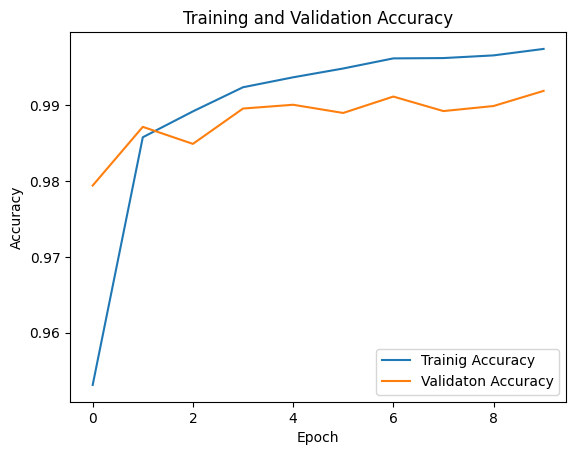

In [ ]:
plt.plot(history.history['accuracy'], label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'],label='Validaton Accuracy')
# Adding labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Adding a legend to the plot
plt.legend()

# Display the plot
plt.show()


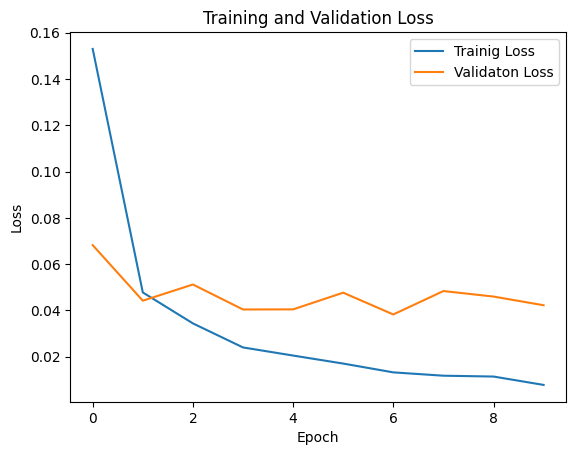

In [ ]:
plt.plot(history.history['loss'], label='Trainig Loss')
plt.plot(history.history['val_loss'],label='Validaton Loss')
# Adding labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Adding a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [ ]:
y_pred= model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


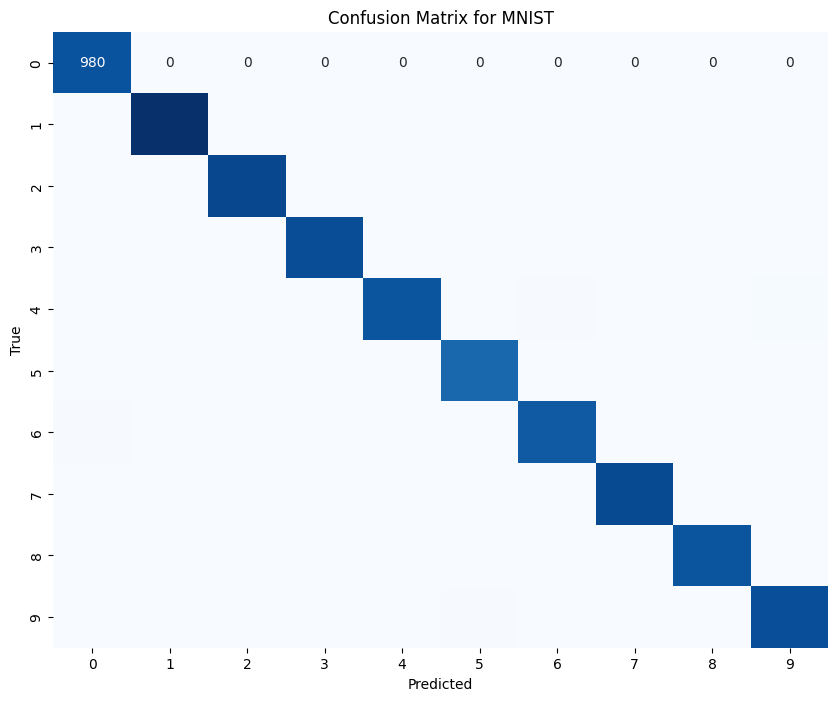

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test


cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MNIST')
plt.show()

Model Testing:

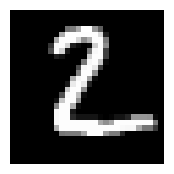

Predicted Label: 2


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[1],cmap='gray')
plt.axis('off')
plt.show()
predicted_label=y_pred[1].argmax()
print('Predicted Label:',predicted_label)

313/313 [==============================] - 2s 6ms/step


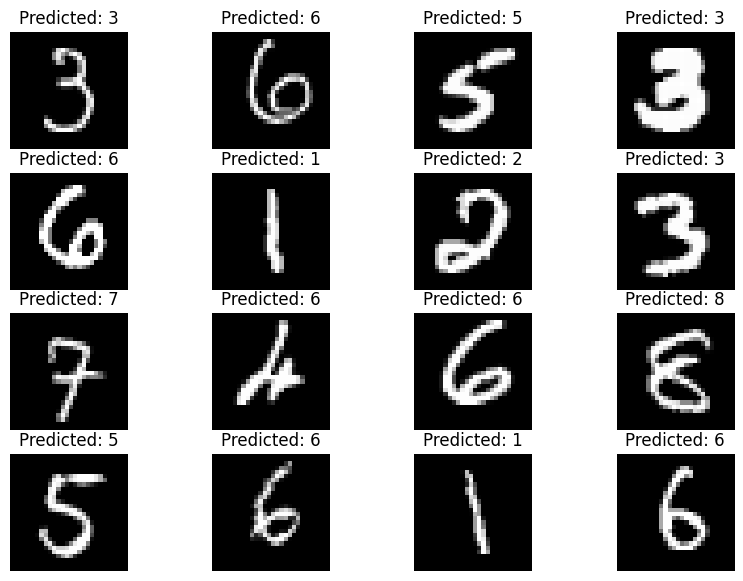

In [ ]:
predictions = model.predict(X_test)

image_indices = [1503, 100, 155,200,886,302,400,500,
                 550,247,384,1202,1521,2000,2504,3000]


plt.figure(figsize=(10, 7))
for i, index in enumerate(image_indices, 1):
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index], cmap='gray')
    plt.axis('off')
    predicted_label = predictions[index].argmax()
    plt.title(f'Predicted: {predicted_label}')

plt.show()
